# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

TASK 1 SOLUTION...

In [73]:
# Reading Dataset.

import os
import pandas as pd

# Define the filename
filename = "Superstore_Marketing_Data.csv"  # Define the filename

if os.path.exists(filename):   # Check if the file exists in the current directory
    print("Reading from local path...")
    data = pd.read_csv(filename)
else:
    print("Reading from github repo...")
    url = "https://github.com/tripathimanoj/probality_mid_course_assisment/raw/main/Superstore_Marketing_Data.csv"   # Read the CSV file from the GitHub repository
    data = pd.read_csv(url)

# Display the first few rows of the dataframe
data.head()



Reading from github repo...


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [74]:
print(f"dataset contains {data.shape[0]} records\nand {data.shape[1]} columns")

dataset contains 2240 records
and 22 columns


In [75]:
data.dtypes # Checking datatype of each columns.
# Need to convert Dt_Customer column datatype to date from object.

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

now what i want is calculate the mean income of all category present in Education column and then replace that category mean in null income with respect to it's Education

In [76]:

e_unique=data['Education'].unique()  # here getting all categories
print(e_unique)

education_mean_income = data.groupby('Education')['Income'].mean() # it will return a mean income of each categories in Education.

def fill_income(row):                    # here in this func we are replacing a particular null values with the mean of respective Education column.
    if pd.isnull(row['Income']):
        return education_mean_income[row['Education']]
    else:
        return row['Income']

data['Income'] = data.apply(fill_income, axis=1) # Applying function to that Income column.

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [77]:
data.shape

(2240, 22)

In [78]:
data

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [79]:
data.isnull().sum() # checking null values after mainupulation.

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [80]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [81]:
# In Dt_Customer we found that their are some dates with this value ######## we have to mainupulate it.
data['Dt_Customer'].unique

<bound method Series.unique of 0        6/16/2014
1        6/15/2014
2        5/13/2014
3         ########
4         ########
           ...    
2235      ########
2236     1/22/2013
2237      ########
2238    11/29/2012
2239      ########
Name: Dt_Customer, Length: 2240, dtype: object>

In [82]:
len(data[data['Dt_Customer']=="########"]) # their are 916 records who have this value ########

916

In [83]:
#imputing with a placeholder date that won't skew the analysis but allows you to retain the information that a customer has enrolled, even if the exact date is unknown.

data['Dt_Customer'] = data['Dt_Customer'].replace('########', '2024-01-01')


In [84]:
# converting all dates to a perticular format ==>
from dateutil import parser

# Function to parse dates and return date part only
def parse_date(date_str):
    try:
        parsed_date = parser.parse(date_str)
        return parsed_date.strftime('%Y-%m-%d')  # Format date as 'YYYY-MM-DD'
    except:
        return None

# Apply the parse_date function to the 'Dt_Customer' column
data['Dt_Customer'] = data['Dt_Customer'].apply(parse_date)

# Now 'Dt_Customer' column is converted to date data type with date part only
print(data['Dt_Customer'].dtypes)


object


In [85]:
data['Dt_Customer']

0       2014-06-16
1       2014-06-15
2       2014-05-13
3       2024-01-01
4       2024-01-01
           ...    
2235    2024-01-01
2236    2013-01-22
2237    2024-01-01
2238    2012-11-29
2239    2024-01-01
Name: Dt_Customer, Length: 2240, dtype: object

In [86]:
l=[]
for i in data['Dt_Customer']:
    l.append(len(i))               # suring that all date have same length or not means no extra char or spacing

if set(l)==10:
    data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d') # converting object to date datatype.

In [87]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data.dtypes

Id                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Response                        int64
Complain                        int64
dtype: object

**descriptive statistics and visualizations.**

In [88]:
data.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Id,2240.0,NaN,NaN,NaN,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2240.0,NaN,NaN,NaN,52253.592375,1730.0,35538.75,51609.5,68289.75,666666.0,25039.085601
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,NaN,NaN,NaN,2017-10-27 12:16:04.285714432,2012-07-30 00:00:00,2013-05-24 18:00:00,2014-03-23 00:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,NaN,NaN,NaN,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393


Observations:

Year_Birth has a long range from  1893(min) and 1996(max).

The birth year less or ewual to 1900 that means the person is not alive.

Income has a max value of 666666 which is far greater than the mean and could be an outlier.

Columns including Income, MntFruits, MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts might have outliers on the right end as there is a large difference between 75th percentile and maximum values.

Recency has an approx equal mean and median which is equal to 49 days.

Highest mean amount spent per customer in the last two years is on wines (approx 303), followed by meat products (approx 166).

**visualizations.**

Descriptive Statistics==>

For Age:Mean,Median,Mode,Standard Deviation,Quartiles (25th, 50th, 75th)

For Education: Frequency counts for each education categorie

For Marital Status: Frequency counts for each marital status category

In [89]:
# Descriptive statistics for Age
# Creating new Age column.
data["Age"] = 2021 - data["Year_Birth"]
print(data["Age"].sort_values())           # As we can see their are some ages which are more than or equal to 100 years which is genearlly not possible

# we have to drop those records where age is > 100 , let's see how many records

print(len(data[data["Age"] > 100])) # their are 3 reocrds which are having > 100 age.
data.drop(data[data["Age"] > 100].index, inplace=True)  # removing the records age > 100

print("*** Descriptive stats of Age ***")
age_stats = data['Age'].describe()
print(age_stats)

562      25
1824     25
697      26
1468     26
964      26
       ... 
1740     80
2171     81
2233    121
827     122
513     128
Name: Age, Length: 2240, dtype: int64
3
*** Descriptive stats of Age ***
count    2237.000000
mean       52.098346
std        11.701917
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: Age, dtype: float64


Observation from Age column:

Count: There are 2237 observations of age in the dataset.

Mean: The average age of customers is approximately 52 years old. This indicates that the dataset consists of mostly middle-aged pople.

Standard Deviation: The standard deviation of approximately 11.7 suggests that ages are somewhat spread out from the mean. There might be some variability in the ages of customers.
Minimum (Min): The youngest customer in the dataset is 25 years old.

25th Percentile (25%): 25% of the customers are below the age of 44.

Median (50%): The median age, which is 51 years old, represents the middle value of the dataset when it's sorted in ascending order. This implies that half of the customers are below 51 years old, and the other half are above.

75th Percentile (75%): 75% of the customers are below the age of 62.

Maximum (Max): The oldest customer in the dataset is 81 years old.

Conclusion: majority of customers are middle-aged, with ages ranging from 25 to 81 years old. ages are slightly skewd towards older ages because the mean being slightly higher than the median.

In [90]:
# Descriptive statistics for Education and Marital Status
# Frequency counts for Education and Marital Status
edu_counts = data['Education'].value_counts()
print(edu_counts)
print('*'*25)
marital_counts = data['Marital_Status'].value_counts()
print(marital_counts)

Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64
*************************
Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [91]:
# Description of Education and Marital_Status columns together
edu_marital_description = pd.concat([data['Education'].describe(), data['Marital_Status'].describe()], axis=1)
edu_marital_description.columns = ['Education', 'Marital_Status']

print("Description of Education and Marital_Status columns in one go: \n")
print(edu_marital_description)


Description of Education and Marital_Status columns in one go: 

         Education Marital_Status
count         2237           2237
unique           5              8
top     Graduation        Married
freq          1127            864


Observation from Education and Marital_Status column:

Count:
Education: There are 2237 observations.
Marital_Status: There are 2237 observations.

Unique Values:
Education: There are 5 unique education levels among customers.
Marital_Status: There are 8 unique marital statuses among customers.

Most Frequent Value :
Education: The most frequent education level among customers is 'Graduation'.
Marital_Status: The most frequent marital status among customers is 'Married'.

Frequency of Most Frequent Value:
Education: The education level 'Graduation' appears 1127 times in the dataset.
Marital_Status: The marital status 'Married' appears 864 times in the dataset.

**visualizations**

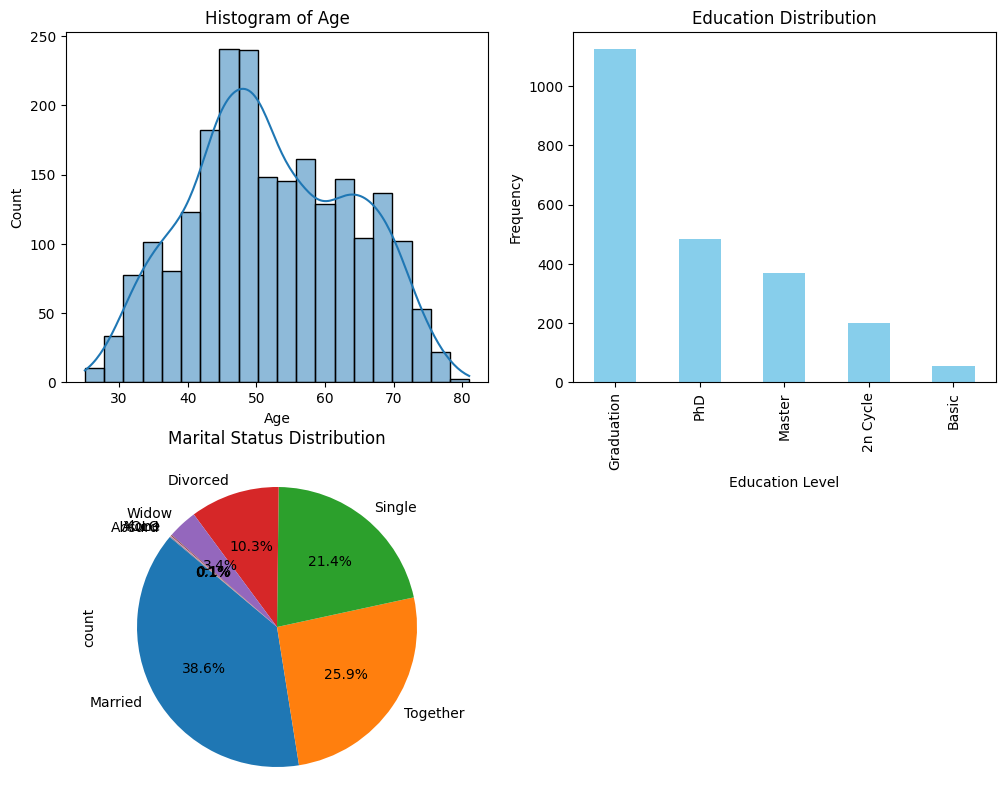

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 10))

# Histogram of Age
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')

# Bar Plot for Education
plt.subplot(2, 2, 2)
edu_counts.plot(kind='bar', color='skyblue')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

# Pie Chart for Marital Status
plt.subplot(2, 2, 3)
marital_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')

plt.show()



## Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Solution Task 2

#### Potential outliers in the dataset....<br>Fristly we will look into the outliers and visualize them using Box Plot and if needed will Transform.

Column 'Income' has 8 outliers.


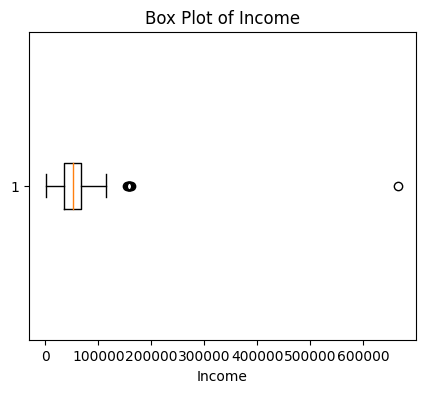

Column 'MntWines' has 35 outliers.


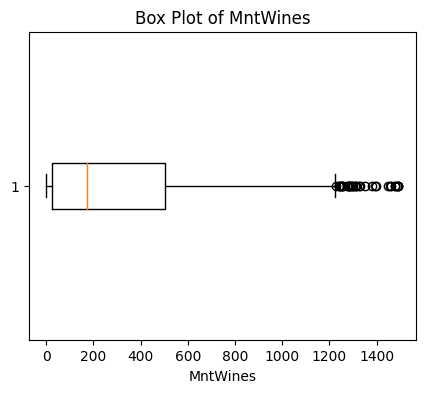

Column 'MntFruits' has 226 outliers.


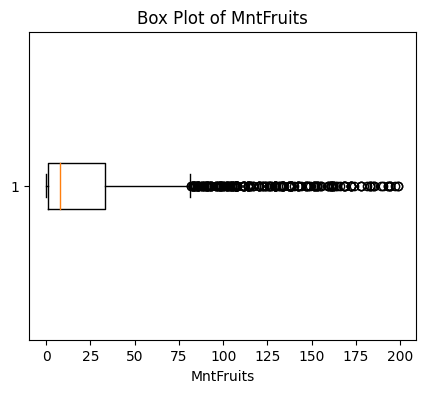

Column 'MntMeatProducts' has 174 outliers.


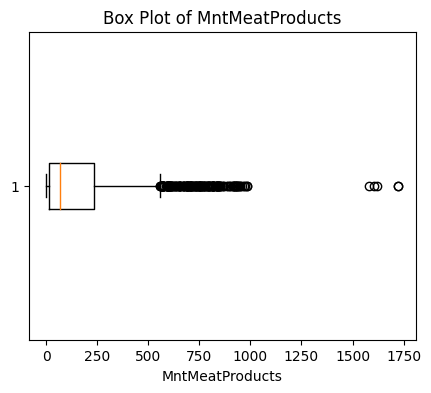

Column 'MntFishProducts' has 223 outliers.


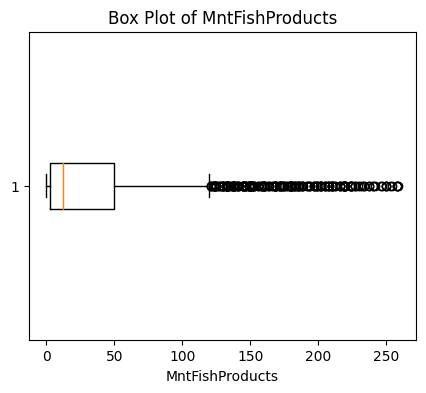

Column 'MntSweetProducts' has 248 outliers.


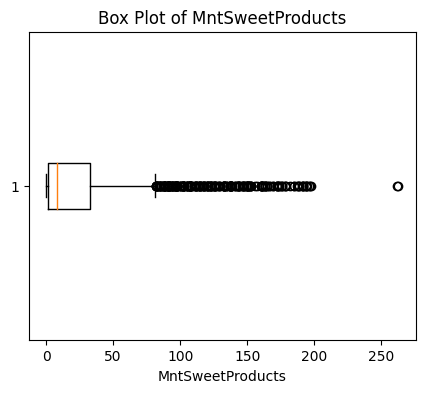

Column 'MntGoldProds' has 206 outliers.


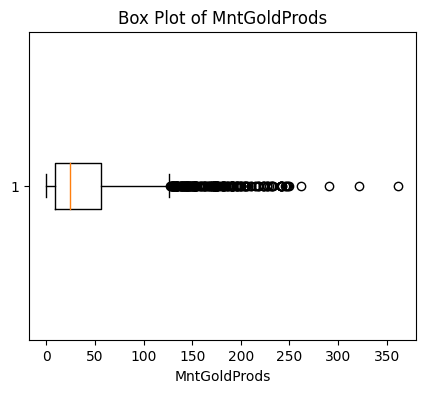

Columns with outliers: ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# numerical columns to check for outliers
numerical_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                     'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                     'MntSweetProducts', 'MntGoldProds']

# Function to identify and handle outliers using IQR method
def handle_outliers(column):

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR   # lower and upper bounds for outliers
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = column[(column < lower_bound) | (column > upper_bound)]

    return outliers


columns_with_outliers = []  # Store columns with outliers

for col in numerical_columns:                       # Loop through each numerical column and identify outliers
    outliers = handle_outliers(data[col])
    if not outliers.empty:
        print(f"Column '{col}' has {len(outliers)} outliers.")
        columns_with_outliers.append(col)

        # Box plot to visualize outliers
        plt.figure(figsize=(5, 4))
        plt.title(f'Box Plot of {col}')
        plt.boxplot(data[col].dropna(), vert=False)
        plt.xlabel(col)
        plt.show()

print("Columns with outliers:", columns_with_outliers)


#### Deliverables For Outliers

For Income Column... <br>
We can see there are some outliers in the income variable.<br>
Some values are expected in real-world scenarios for the income variable but we can remove the data point on the extreme right end of the boxplot because that might be a data entry error.

In [94]:
print("Total count greater thatn 200000 are: ",len(data[data["Income"] > 200000])) # so, as here is only one reocrd so we can remove it.
data.drop(index=data[data.Income > 200000].index, inplace=True) # removed data.

Total count greater thatn 200000 are:  1


For MntWines Column...<br>

There are some outliers on the right end of the boxplot but we will not treat them as otulier because as some of the variation is always expected in real-word while spending money on products like wine.

For MntFruits Column...<br>

There are some outliers on the right end of the boxplot but we will not treat them as otulier because as some of the variation is always expected in real-word while spending money on products.

For MntMeatProducts Column...<br>

The distribution for the amount spent on meat products is highly skewed to the right, as some of the values are very far from the rest of the vlaues <br>
We can cap the value of the variable to the next highest value.<br>


In [95]:
data.MntMeatProducts.nlargest(10) # top 10 amount spent on the product, let's cap the outlier values to 984 amount.

325     1725
961     1725
497     1622
1213    1607
2204    1582
1921     984
53       981
994      974
2021     968
1338     961
Name: MntMeatProducts, dtype: int64

In [96]:
# caping the values
data["MntMeatProducts"].clip(upper=984, inplace=True) # values capped to 984
max(data["MntMeatProducts"])                          # checking by finding max value

984

For MntFishProducts Column...<br>

There are some outliers on the right end of the boxplot but we will not treat them as otulier because as some people spends more in Fish products.

For MntSweetProducts Column...<br>

There are outliers on the right side , although it shows the market trends , but we will cap some of the max values to the next highest values.

In [97]:
data.MntSweetProducts.nlargest(10) # finding 10 largest values

449     263
210     262
305     198
31      197
1502    196
2067    195
994     194
1143    194
1785    194
1055    192
Name: MntSweetProducts, dtype: int64

In [98]:
data[data["MntSweetProducts"] > 200] # checking how many records have > 200

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
210,4619,1945,PhD,Single,113734.000000,0,0,2014-05-28,9,6,...,262,3,0,27,0,0,1,0,0,76
449,5255,1986,Graduation,Single,52720.373656,1,0,2013-02-20,19,5,...,263,362,0,27,0,0,1,0,0,35


In [99]:
data["MntSweetProducts"].clip(upper=198, inplace=True) # capping to next largest value which 198
max(data["MntSweetProducts"])

198

For MntGoldProds Column...<br>

There are outliers on the right side , although it shows the market trends , but we will cap some of the max values to the required value.

In [100]:
data.MntGoldProds.nlargest(10) # finding 10 largest values

449     362
14      321
2063    291
60      262
1789    249
486     248
1030    247
419     246
1339    245
698     242
Name: MntGoldProds, dtype: int64

In [101]:
data[data["MntGoldProds"] > 250]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
14,10311,1969,Graduation,Married,4428.000000,0,1,2024-01-01,0,16,...,4,321,0,25,0,0,1,0,0,52
60,4246,1982,Master,Single,6560.000000,0,0,2024-01-01,2,67,...,3,262,0,1,0,1,17,0,0,39
449,5255,1986,Graduation,Single,52720.373656,1,0,2013-02-20,19,5,...,198,362,0,27,0,0,1,0,0,35
2063,6237,1966,PhD,Single,7144.000000,0,2,2024-01-01,92,81,...,2,291,0,23,1,1,0,0,0,55


In [102]:
data["MntGoldProds"].clip(upper=249, inplace=True)
max(data["MntGoldProds"])    # checking the max capped value

249

### Calculatting measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables

In [103]:
key_variables = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntGoldProds']  # Selecting key numerical variables

for var in key_variables:           # Calculating measures of central tendency and dispersion
    print('*'*40)
    print("\nFor Variable:", var)
    print("Mean:", data[var].mean())
    print("Median:", data[var].median())
    print("Mode:", data[var].mode()[0])
    print("Variance:", data[var].var())
    print("Standard Deviation:", data[var].std())




****************************************

For Variable: Income
Mean: 51968.25890925515
Median: 51566.0
Mode: 7500.0
Variance: 458516518.9093364
Standard Deviation: 21412.998830367884
****************************************

For Variable: Recency
Mean: 49.116279069767444
Median: 49.0
Mode: 56
Variance: 838.5242807346132
Standard Deviation: 28.957283725077065
****************************************

For Variable: MntWines
Mean: 304.12745974955277
Median: 174.0
Mode: 2
Variance: 113294.04683399166
Standard Deviation: 336.5918104083812
****************************************

For Variable: MntFruits
Mean: 26.275939177101968
Median: 8.0
Mode: 0
Variance: 1577.9967541511085
Standard Deviation: 39.724007277100185
****************************************

For Variable: MntMeatProducts
Mean: 165.4892665474061
Median: 67.0
Mode: 7
Variance: 47483.808833287316
Standard Deviation: 217.9077989271777
****************************************

For Variable: MntGoldProds
Mean: 43.87567084078712
Medi

### Deliverables for the central tendency and measure of dispersion

Income:<br>
The mean income of customers is approximately 51,968.
The median income is slightly lower, indicating that the distribution might be slightly skewed.
The mode income, which is $7,500, suggests that there might be a group of customers with lower incomes.
The variance and standard deviation are relatively high, indicating a wide dispersion of income values.

Recency:<br>
The mean number of days since the last purchase is approximately 49 days.
The median and mode are close to the mean, suggesting a relatively symmetric distribution.
The variance and standard deviation are relatively low, indicating that most customers made purchases relatively recently, with little variation.
MntWines, MntFruits, MntMeatProducts, and MntGoldProds:

For all these variables, there's a notable difference between the mean and median values, indicating potential skewness in the distribution.
The mode for these variables tends to be close to zero or very low, suggesting that a significant portion of customers might not purchase these types of products at all or purchase them infrequently.

The variance and standard deviation are relatively high for these variables, indicating a wide dispersion of purchase amounts among customers.
These insights provide a basic understanding of the distribution and variability of key variables in the dataset. Further analysis could involve examining relationships between these variables or investigating potential factors contributing to the observed distributions and variations.

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Solution Task3

In [104]:
import numpy as np
from scipy.stats import binom, norm

# Binomial Distribution Parameters

# Assuming your dataset is stored in a DataFrame called 'df'
deals_trials = data['NumDealsPurchases'].max()
deals_prob = data['NumDealsPurchases'].mean() / deals_trials

web_trials = data['NumWebPurchases'].max()
web_prob = data['NumWebPurchases'].mean() / web_trials

catalog_trials = data['NumCatalogPurchases'].max()
catalog_prob = data['NumCatalogPurchases'].mean() / catalog_trials

store_trials = data['NumStorePurchases'].max()
store_prob = data['NumStorePurchases'].mean() / store_trials

# Normal Distribution Parameters
income_mean = data['Income'].mean()
income_std = data['Income'].std()

mnt_wines_mean = data['MntWines'].mean()
mnt_wines_std = data['MntWines'].std()

mnt_fruits_mean = data['MntFruits'].mean()
mnt_fruits_std = data['MntFruits'].std()

mnt_meat_mean = data['MntMeatProducts'].mean()
mnt_meat_std = data['MntMeatProducts'].std()

mnt_gold_mean = data['MntGoldProds'].mean()
mnt_gold_std = data['MntGoldProds'].std()

# Binomial Distribution Calculations
deals_prob_3 = binom.pmf(3, deals_trials, deals_prob)
deals_expected = deals_trials * deals_prob

web_prob_2 = binom.pmf(2, web_trials, web_prob)
web_expected = web_trials * web_prob

catalog_prob_2 = binom.pmf(2, catalog_trials, catalog_prob)
catalog_expected = catalog_trials * catalog_prob

store_prob_3 = binom.pmf(3, store_trials, store_prob)
store_expected = store_trials * store_prob

# Normal Distribution Calculations
income_prob_between = norm.cdf(60000, income_mean, income_std) - norm.cdf(40000, income_mean, income_std)
income_expected = income_mean

mnt_wines_prob_within_std = norm.cdf(mnt_wines_mean + mnt_wines_std, mnt_wines_mean, mnt_wines_std) - norm.cdf(mnt_wines_mean - mnt_wines_std, mnt_wines_mean, mnt_wines_std)
mnt_wines_expected = mnt_wines_mean

mnt_fruits_prob_within_std = norm.cdf(mnt_fruits_mean + mnt_fruits_std, mnt_fruits_mean, mnt_fruits_std) - norm.cdf(mnt_fruits_mean - mnt_fruits_std, mnt_fruits_mean, mnt_fruits_std)
mnt_fruits_expected = mnt_fruits_mean

mnt_meat_prob_within_std = norm.cdf(mnt_meat_mean + mnt_meat_std, mnt_meat_mean, mnt_meat_std) - norm.cdf(mnt_meat_mean - mnt_meat_std, mnt_meat_mean, mnt_meat_std)
mnt_meat_expected = mnt_meat_mean

mnt_gold_prob_within_std = norm.cdf(mnt_gold_mean + mnt_gold_std, mnt_gold_mean, mnt_gold_std) - norm.cdf(mnt_gold_mean - mnt_gold_std, mnt_gold_mean, mnt_gold_std)
mnt_gold_expected = mnt_gold_mean

# Print results
print("Binomial Distribution:")
print()
print(f"NumDealsPurchases - Probability of 3 purchases: {deals_prob_3:.4f}, Expected number of purchases: {deals_expected:.2f}")
print(f"NumWebPurchases - Probability of 2 purchases: {web_prob_2:.4f}, Expected number of purchases: {web_expected:.2f}")
print(f"NumCatalogPurchases - Probability of 2 purchases: {catalog_prob_2:.4f}, Expected number of purchases: {catalog_expected:.2f}")
print(f"NumStorePurchases - Probability of 3 purchases: {store_prob_3:.4f}, Expected number of purchases: {store_expected:.2f}")

print("\nNormal Distribution:")
print()
print(f"Income - Probability of income between $40,000 and $60,000: {income_prob_between:.4f}, Expected income: ${income_expected:.2f}")
print(f"MntWines - Probability of purchases within one standard deviation from the mean: {mnt_wines_prob_within_std:.4f}, Expected value: {mnt_wines_expected:.2f}")
print(f"MntFruits - Probability of purchases within one standard deviation from the mean: {mnt_fruits_prob_within_std:.4f}, Expected value: {mnt_fruits_expected:.2f}")
print(f"MntMeatProducts - Probability of purchases within one standard deviation from the mean: {mnt_meat_prob_within_std:.4f}, Expected value: {mnt_meat_expected:.2f}")
print(f"MntGoldProds - Probability of purchases within one standard deviation from the mean: {mnt_gold_prob_within_std:.4f}, Expected value: {mnt_gold_expected:.2f}")


Binomial Distribution:

NumDealsPurchases - Probability of 3 purchases: 0.2246, Expected number of purchases: 2.33
NumWebPurchases - Probability of 2 purchases: 0.1328, Expected number of purchases: 4.09
NumCatalogPurchases - Probability of 2 purchases: 0.2543, Expected number of purchases: 2.66
NumStorePurchases - Probability of 3 purchases: 0.0692, Expected number of purchases: 5.80

Normal Distribution:

Income - Probability of income between $40,000 and $60,000: 0.3581, Expected income: $51968.26
MntWines - Probability of purchases within one standard deviation from the mean: 0.6827, Expected value: 304.13
MntFruits - Probability of purchases within one standard deviation from the mean: 0.6827, Expected value: 26.28
MntMeatProducts - Probability of purchases within one standard deviation from the mean: 0.6827, Expected value: 165.49
MntGoldProds - Probability of purchases within one standard deviation from the mean: 0.6827, Expected value: 43.88


### Deliverables For the probality distributions...

Binomial Distributions:

For the variable NumDealsPurchases, the probability of observing 3 purchases is approximately 0.225, and the expected number of purchases is approximately 2.33.
For the variable NumWebPurchases, the probability of observing 2 purchases is approximately 0.133, and the expected number of purchases is approximately 4.09.
For the variable NumCatalogPurchases, the probability of observing 2 purchases is approximately 0.254, and the expected number of purchases is approximately 2.66.
For the variable NumStorePurchases, the probability of observing 3 purchases is approximately 0.069, and the expected number of purchases is approximately 5.80.
Normal Distributions:

For the variable Income, the probability of having an income between 40,000 and 60,000 is approximately 0.358, and the expected income is approximately 51,968.26.
For the variable MntWines, the probability of purchases within one standard deviation from the mean is approximately 0.683, and the expected value is approximately 304.13.
For the variable MntFruits, the probability of purchases within one standard deviation from the mean is approximately 0.683, and the expected value is approximately 26.28.
For the variable MntMeatProducts, the probability of purchases within one standard deviation from the mean is approximately 0.683, and the expected value is approximately 165.49.
For the variable MntGoldProds, the probability of purchases within one standard deviation from the mean is approximately 0.683, and the expected value is approximately 43.88.
These insights provide a glimpse into the probabilities and expected values associated with each variable's distribution, shedding light on their central tendencies and variations.

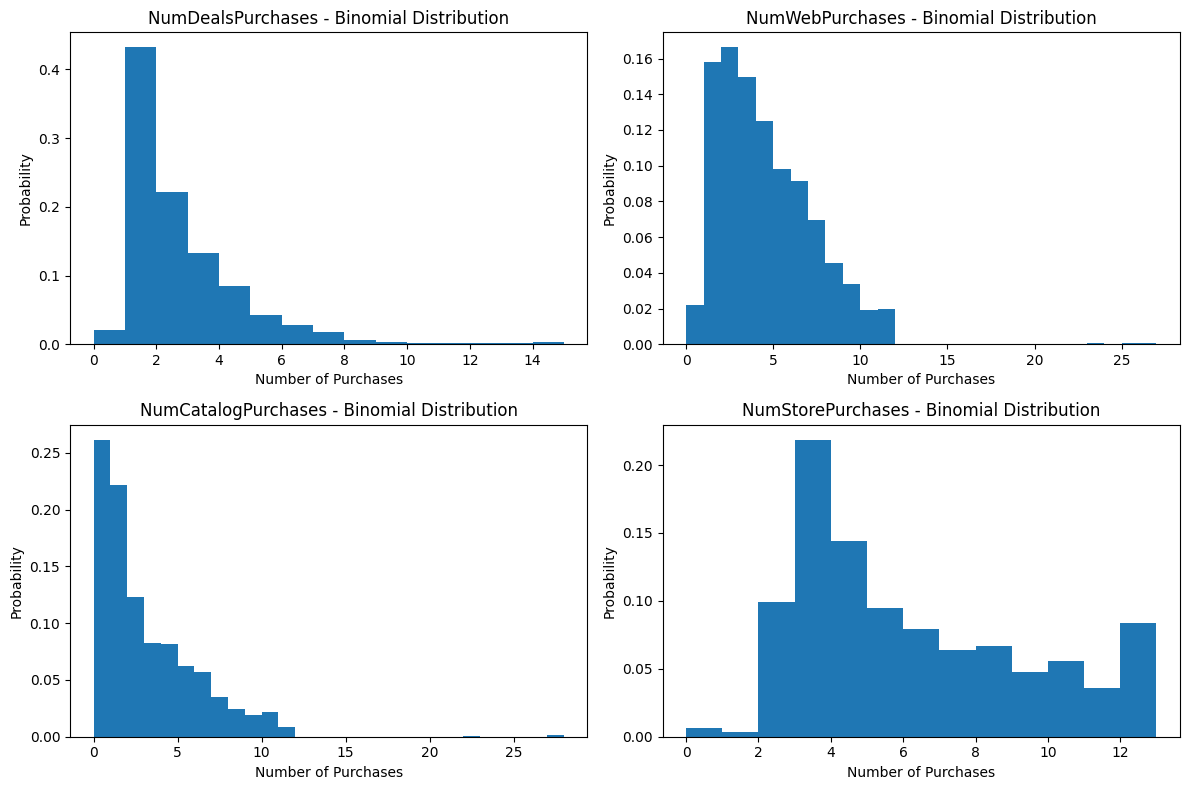

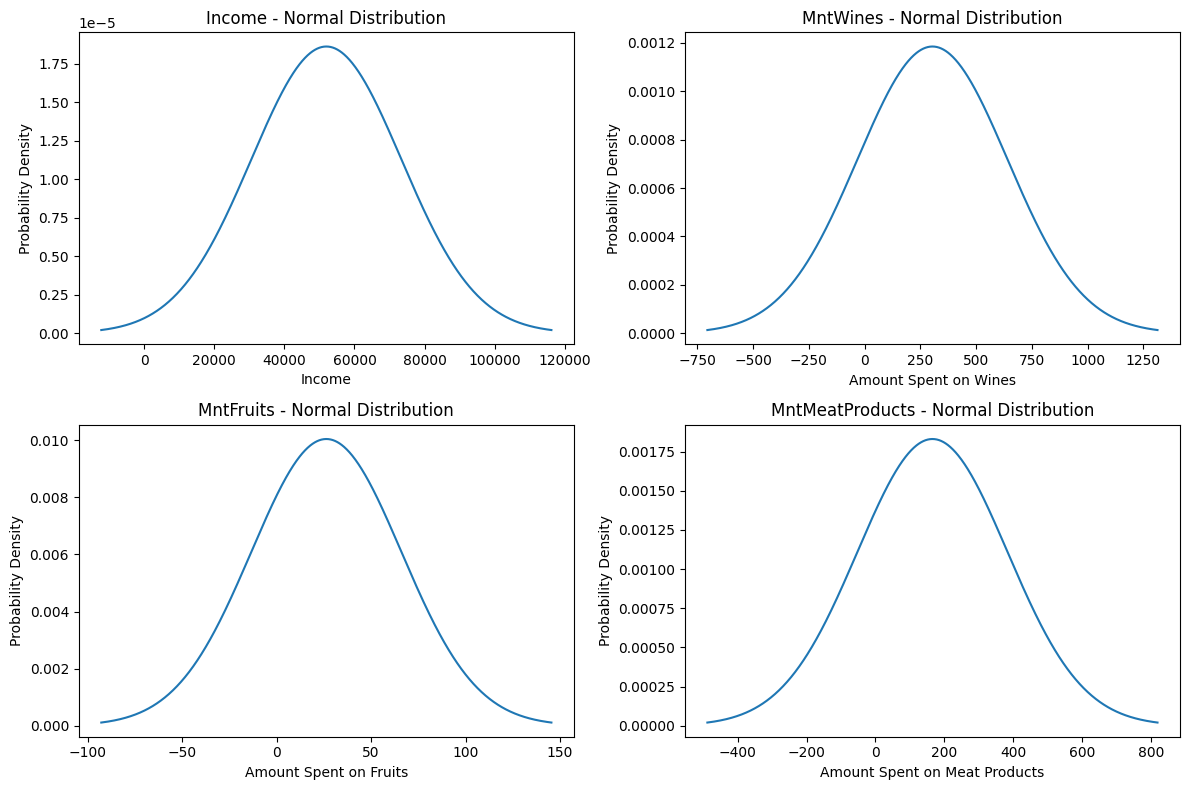

In [105]:
# Visualization
plt.figure(figsize=(12, 8))

# Histogram for Binomial Distributions
plt.subplot(2, 2, 1)
plt.hist(data['NumDealsPurchases'], bins=np.arange(data['NumDealsPurchases'].min(), data['NumDealsPurchases'].max() + 1), density=True)
plt.title('NumDealsPurchases - Binomial Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Probability')

plt.subplot(2, 2, 2)
plt.hist(data['NumWebPurchases'], bins=np.arange(data['NumWebPurchases'].min(), data['NumWebPurchases'].max() + 1), density=True)
plt.title('NumWebPurchases - Binomial Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Probability')

plt.subplot(2, 2, 3)
plt.hist(data['NumCatalogPurchases'], bins=np.arange(data['NumCatalogPurchases'].min(), data['NumCatalogPurchases'].max() + 1), density=True)
plt.title('NumCatalogPurchases - Binomial Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Probability')

plt.subplot(2, 2, 4)
plt.hist(data['NumStorePurchases'], bins=np.arange(data['NumStorePurchases'].min(), data['NumStorePurchases'].max() + 1), density=True)
plt.title('NumStorePurchases - Binomial Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Probability')

plt.tight_layout()

# PDFs for Normal Distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
x_income = np.linspace(income_mean - 3*income_std, income_mean + 3*income_std, 1000)
plt.plot(x_income, norm.pdf(x_income, income_mean, income_std))
plt.title('Income - Normal Distribution')
plt.xlabel('Income')
plt.ylabel('Probability Density')

plt.subplot(2, 2, 2)
x_wines = np.linspace(mnt_wines_mean - 3*mnt_wines_std, mnt_wines_mean + 3*mnt_wines_std, 1000)
plt.plot(x_wines, norm.pdf(x_wines, mnt_wines_mean, mnt_wines_std))
plt.title('MntWines - Normal Distribution')
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Probability Density')

plt.subplot(2, 2, 3)
x_fruits = np.linspace(mnt_fruits_mean - 3*mnt_fruits_std, mnt_fruits_mean + 3*mnt_fruits_std, 1000)
plt.plot(x_fruits, norm.pdf(x_fruits, mnt_fruits_mean, mnt_fruits_std))
plt.title('MntFruits - Normal Distribution')
plt.xlabel('Amount Spent on Fruits')
plt.ylabel('Probability Density')

plt.subplot(2, 2, 4)
x_meat = np.linspace(mnt_meat_mean - 3*mnt_meat_std, mnt_meat_mean + 3*mnt_meat_std, 1000)
plt.plot(x_meat, norm.pdf(x_meat, mnt_meat_mean, mnt_meat_std))
plt.title('MntMeatProducts - Normal Distribution')
plt.xlabel('Amount Spent on Meat Products')
plt.ylabel('Probability Density')

plt.tight_layout()

plt.show()

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Solution Task 4

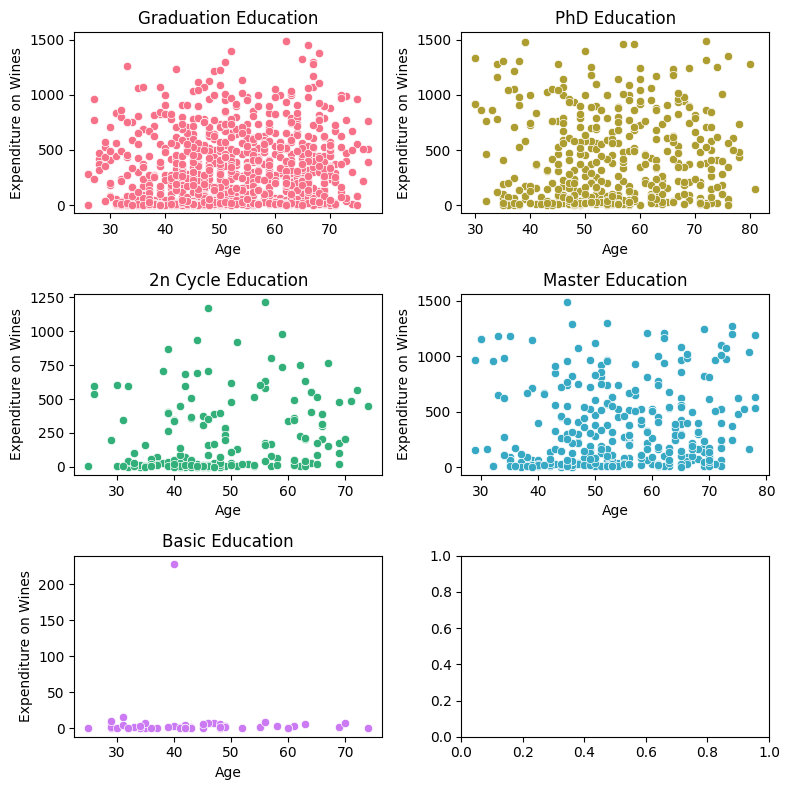

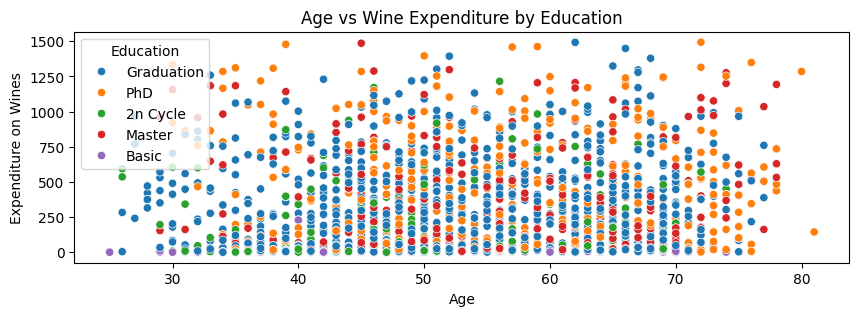

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of unique education categories
education_categories = data['Education'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

# Flatten axes for easier iteration
axes = axes.flatten()

# Define color palette for each education category
palette = sns.color_palette("husl", len(education_categories))

# Loop through each education category
for i, edu_cat in enumerate(education_categories):
    # Filter data for the current education category
    edu_data = data[data['Education'] == edu_cat]

    # Plot scatter plot for the current education category
    sns.scatterplot(x='Age', y='MntWines', data=edu_data, ax=axes[i], color=palette[i])
    axes[i].set_title(f'{edu_cat} Education')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Expenditure on Wines')

# Adjust layout
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 3))
sns.scatterplot(x='Age', y='MntWines', hue='Education', data=data)
plt.title('Age vs Wine Expenditure by Education')
plt.xlabel('Age')
plt.ylabel('Expenditure on Wines')
plt.show()


### Deliverables

As we can see in the graph only Basic education category is spending very less amount in wine , their is only one value whihc is above 200.<br>
In graduation , masters and phd maximum spending is reaching till 15000, their is no limit in age group which is very random.<br>
In 2n cycle education the maximum spending is reaching till 1250.<br>
<br>
so we can say that Age,gender are highly co-related with the MntWines.


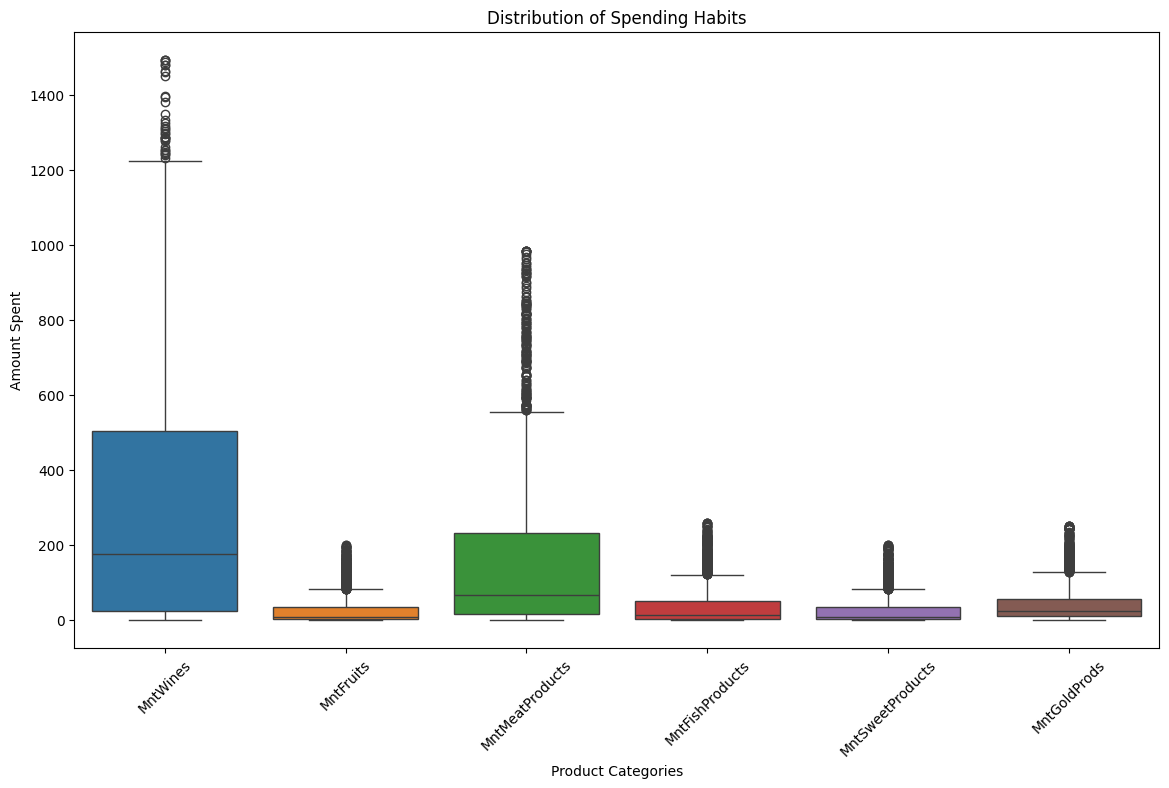

In [107]:
# Visualizing spending habits distribution
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[spending_columns])
plt.title('Distribution of Spending Habits')
plt.ylabel('Amount Spent')
plt.xlabel('Product Categories')
plt.xticks(rotation=45)
plt.show()

### Deliverables

From this box plot we can see that their are some features on which people are spending very large/huge amount like MntWines and MntMeatProducts.<br>
MntWines is the one where maximum spending was tracked.

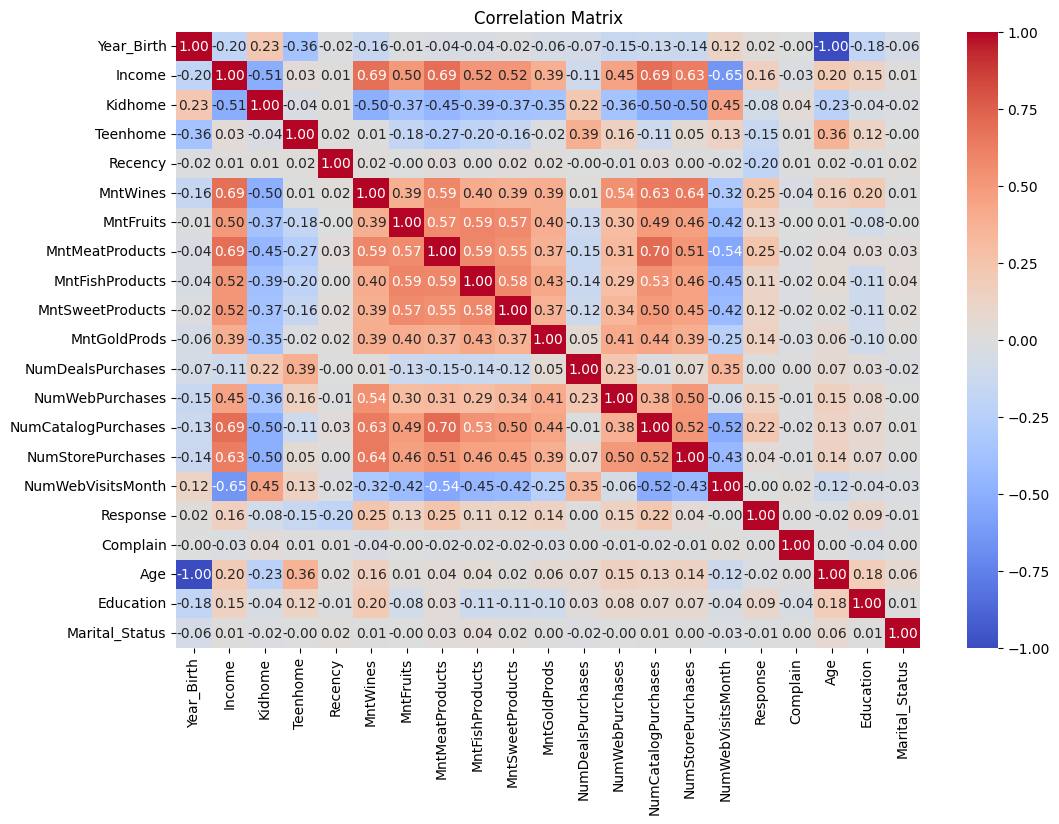

In [108]:
from sklearn.preprocessing import LabelEncoder        # For ploting heat map to see the co-relation we need to convert the categorical columns to numerical columns for that we need lable encoder.

label_encoder = LabelEncoder()             # Initialize LabelEncoder


data['Education'] = label_encoder.fit_transform(data['Education'])             # Encode 'Education' and Marital_Status column
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])

columns_for_correlation = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',      # selecting important columns for the heat map.
                           'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                           'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                           'NumWebVisitsMonth', 'Response', 'Complain', 'Age', 'Education','Marital_Status']


corr_matrix = data[columns_for_correlation].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



### Deliverables

The variables which are having corelation value greater than 0.50 are co-related with each other and are important for model prediction.<br>
Although the value of co-relation is highly dependent on problem statement and business use case.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Solution Task 5

## Deliverables <br>

All the required visualizations and their findings are done in respective task section above.<br>

Some of the findings are follows as below,based on the analysis:<br>

1: Segmentation: The company can segment customers based on demographics, education level, and spending habits to target specific groups more effectively.<br>
2: Marketing Strategies: Tailor marketing strategies based on customer segments to maximize engagement and sales. For example, target promotions on wine products to customers with higher education levels.<br>
3: Outlier Detection: Continuously monitor for outliers in income and spending columns to ensure data quality and accurate analysis.<br>
4: Customer Experience: Gather feedback and insights from different customer segments to improve the overall customer experience and satisfaction.<br>
Understanding customer demographics and spending behaviors can help the company develop targeted marketing strategies and enhance customer satisfaction, ultimately leading to increased sales and profit in their business.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍